# Hybarid test

In [1]:
import matplotlib
matplotlib.use("pdf")
%matplotlib inline
import matplotlib.pyplot as plt
import rebound
print(rebound.__build__)
import numpy as np

Feb  8 2016 17:42:22


In [21]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=5e-5,a=.5)
sim.add(m=5e-5,a=.7,r=1.6e-4)
Nplanetesimal = 100
for i in range(Nplanetesimal):
    sim.add(m=1e-6,a=np.random.uniform(0.45,0.75),f=np.random.uniform(0,2.*np.pi),r=4e-5)
sim.N_active = sim.N-Nplanetesimal
sim.testparticle_type=1
sim.collision = "direct"
sim.collision_resolve = "merge"

In [22]:
print(sim.N)
sim.integrator = "hybarid"
sim.ri_hybarid.switch_ratio = 2.
sim.dt = 0.01
%timeit -n1 -r1 sim.integrate(100.)
print(sim.N)

103
1 loop, best of 1: 1.63 s per loop
99


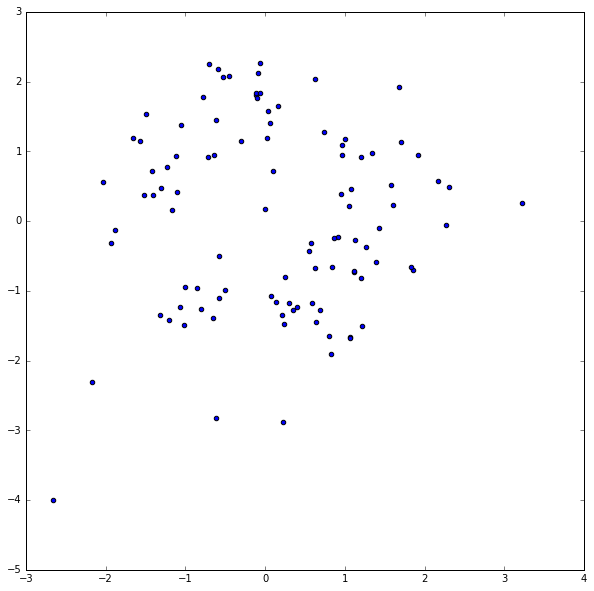

In [4]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
x = [p.x for p in sim.particles]
y = [p.y for p in sim.particles]
ax.scatter(x,y)